In [1]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import spacy
from textblob import TextBlob
%matplotlib inline

In [2]:
#import all the SOTU txt files
data_folder = 'state-of-the-union-corpus-1989-2017'
file_list = [os.path.join(data_folder, fn) for fn in os.listdir(data_folder)]

#create lists for the year and President who gave the speech
years = []
potus = []
for file in os.listdir(data_folder):
    year = file[:4]
    pres = file[5:-4]
    pres = re.sub('[^a-zA-Z]+', '', pres)
    years.append(year)
    potus.append(pres)

In [3]:
df = pd.DataFrame(file_list, columns=['path'])
df['year'] = years
df['year'] = df['year'].astype(int)
df['president'] = potus

#create a list of Democrat presidents
dems = ['Truman', 'Kennedy', 'Johnson', 'Carter', 'Clinton', 'Obama']
#add party affiliation to the dataframe
df['party'] = df.president.apply(lambda x: 'Democrat' if x in dems else 'Republican')

In [4]:
#use textblob to tokenize the words in each speech
df['tokens'] = df.path.apply(lambda x: TextBlob(open(x, encoding='ISO-8859-1').read()).words)
#use textblob to perform a sentiment analysis of each speech
df['sentiment'] = df.path.apply(lambda x: TextBlob(open(x, encoding='ISO-8859-1').read()).sentiment.polarity)

df.head()

,path,year,president,party,tokens,sentiment
0,state-of-the-union-corpus-1989-2017\1945-Truma...,1945,Truman,Democrat,"[PRESIDENT, HARRY, S, TRUMAN, 'S, ADDRESS, BEF...",0.103764
1,state-of-the-union-corpus-1989-2017\1946-Truma...,1946,Truman,Democrat,"[PRESIDENT, HARRY, S, TRUMAN, 'S, MESSAGE, TO,...",0.111545
2,state-of-the-union-corpus-1989-2017\1947-Truma...,1947,Truman,Democrat,"[PRESIDENT, HARRY, S, TRUMAN, 'S, ANNUAL, MESS...",0.136731
3,state-of-the-union-corpus-1989-2017\1948-Truma...,1948,Truman,Democrat,"[PRESIDENT, HARRY, S, TRUMAN, 'S, ANNUAL, MESS...",0.165403
4,state-of-the-union-corpus-1989-2017\1949-Truma...,1949,Truman,Democrat,"[PRESIDENT, HARRY, S, TRUMAN, 'S, ANNUAL, MESS...",0.155075


In [5]:
df.dtypes

path          object
year           int32
president     object
party         object
tokens        object
sentiment    float64
dtype: object

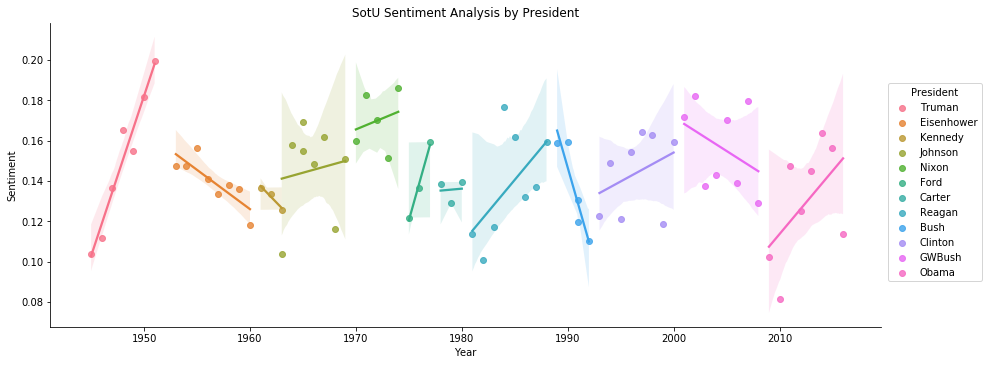

In [6]:
g = sns.lmplot(x="year", y="sentiment", hue="president", truncate=True, aspect=2.5, data=df)
g._legend.set_title('President')
plt.xlabel('Year')
plt.ylabel('Sentiment')
plt.title('SotU Sentiment Analysis by President')

plt.show()

In [7]:
#utility function to clean text
def text_cleaner(text):
    
    # Visual inspection shows spaCy does not recognize the double dash '--', get rid of it
    text = re.sub(r'--',' ',text)
    
    # Get rid of headings in brakets.
    text = re.sub('[\[].*?[\]]', '', text)
    
    # Get rid of extra whitespace.
    text = ' '.join(text.split())
    
    return text

In [8]:
nlp = spacy.load('en_core_web_sm')

df['text'] = df.path.apply(lambda x: open(x, encoding='ISO-8859-1').read())
df['text'] = df.text.apply(lambda x: text_cleaner(x))

In [9]:
df['nlp'] = df.text.apply(lambda x: nlp(x))
df.head()

,path,year,president,party,tokens,sentiment,text,nlp
0,state-of-the-union-corpus-1989-2017\1945-Truma...,1945,Truman,Democrat,"[PRESIDENT, HARRY, S, TRUMAN, 'S, ADDRESS, BEF...",0.103764,PRESIDENT HARRY S. TRUMAN'S ADDRESS BEFORE A J...,"(PRESIDENT, HARRY, S., TRUMAN, 'S, ADDRESS, BE..."
1,state-of-the-union-corpus-1989-2017\1946-Truma...,1946,Truman,Democrat,"[PRESIDENT, HARRY, S, TRUMAN, 'S, MESSAGE, TO,...",0.111545,PRESIDENT HARRY S. TRUMAN'S MESSAGE TO THE CON...,"(PRESIDENT, HARRY, S., TRUMAN, 'S, MESSAGE, TO..."
2,state-of-the-union-corpus-1989-2017\1947-Truma...,1947,Truman,Democrat,"[PRESIDENT, HARRY, S, TRUMAN, 'S, ANNUAL, MESS...",0.136731,PRESIDENT HARRY S. TRUMAN'S ANNUAL MESSAGE TO ...,"(PRESIDENT, HARRY, S., TRUMAN, 'S, ANNUAL, MES..."
3,state-of-the-union-corpus-1989-2017\1948-Truma...,1948,Truman,Democrat,"[PRESIDENT, HARRY, S, TRUMAN, 'S, ANNUAL, MESS...",0.165403,PRESIDENT HARRY S. TRUMAN'S ANNUAL MESSAGE TO ...,"(PRESIDENT, HARRY, S., TRUMAN, 'S, ANNUAL, MES..."
4,state-of-the-union-corpus-1989-2017\1949-Truma...,1949,Truman,Democrat,"[PRESIDENT, HARRY, S, TRUMAN, 'S, ANNUAL, MESS...",0.155075,PRESIDENT HARRY S. TRUMAN'S ANNUAL MESSAGE TO ...,"(PRESIDENT, HARRY, S., TRUMAN, 'S, ANNUAL, MES..."


In [10]:
stop_words = stopwords.words('english')

def word_frequencies(text, include_stop=False):
    
    # Build a list of words.
    # Strip out punctuation and, optionally, stop words.
    words = []
    for token in text:
        if not token.is_punct and token.is_alpha and not token.is_stop and token.lower_ not in stop_words:
            words.append(token.text)
            
    # Build and return a Counter object containing word counts.
    return Counter(words)

In [11]:
from collections import Counter

freq_list = []
for speeches in df.nlp:
    sotus_freq = word_frequencies(speeches, include_stop=False).most_common(10)
    freq_list.append(sotus_freq)
    
for a, b, c in zip(df.president, df.year, freq_list):
    print(a, b, c)

Truman 1945 [('peace', 23), ('world', 20), ('America', 11), ('people', 10), ('nations', 10), ('hope', 8), ('freedom', 7), ('great', 6), ('shall', 6), ('man', 5)]
Truman 1946 [('dollars', 207), ('year', 181), ('war', 165), ('million', 137), ('fiscal', 125), ('expenditures', 93), ('United', 91), ('program', 90), ('Government', 90), ('billion', 83)]
Truman 1947 [('Congress', 27), ('labor', 26), ('national', 22), ('program', 21), ('management', 18), ('Government', 17), ('war', 16), ('year', 15), ('world', 15), ('housing', 14)]
Truman 1948 [('world', 29), ('economic', 23), ('people', 22), ('great', 17), ('Nation', 15), ('Congress', 14), ('program', 14), ('tax', 14), ('United', 13), ('States', 13)]
Truman 1949 [('Congress', 17), ('Government', 17), ('people', 15), ('world', 14), ('prosperity', 12), ('production', 12), ('good', 10), ('great', 10), ('housing', 10), ('economy', 9)]
Truman 1950 [('world', 27), ('Congress', 20), ('economic', 19), ('years', 18), ('life', 17), ('great', 15), ('peop

Bush 1991 [('world', 29), ('America', 20), ('know', 18), ('American', 17), ('freedom', 14), ('future', 14), ('people', 13), ('power', 12), ('States', 11), ('new', 10)]
Bush 1991 [('world', 24), ('war', 20), ('peace', 15), ('people', 13), ('American', 12), ('home', 12), ('new', 12), ('time', 10), ('Let', 10), ('America', 9)]
Bush 1992 [('people', 26), ('know', 24), ('world', 23), ('plan', 23), ('right', 19), ('American', 18), ('country', 17), ('new', 17), ('help', 17), ('Congress', 14)]
Clinton 1993 [('people', 45), ('new', 29), ('American', 28), ('plan', 26), ('country', 26), ('Government', 24), ('care', 24), ('jobs', 24), ('work', 23), ('year', 22)]
Clinton 1994 [('people', 63), ('health', 41), ('care', 40), ('work', 34), ('year', 31), ('Congress', 24), ('American', 22), ('world', 22), ('know', 22), ('country', 21)]
Clinton 1995 [('people', 73), ('work', 42), ('Government', 35), ('country', 34), ('years', 29), ('year', 29), ('time', 28), ('way', 28), ('new', 27), ('know', 26)]
Clinton

In [12]:
from wordcloud import WordCloud

def word_clouds(text_list):
    plt.figure(figsize=(15, 100))
    n = 0
    x = 1
    for texts in text_list:
        plt.subplot(40, 2, x)
        wordcloud = WordCloud(stopwords=stop_words, max_words=20).generate(texts)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(df.president[n] + ' ' + str(df.year[n]))
        plt.axis("off")
        n += 1
        x += 1
    plt.tight_layout()
    plt.show()

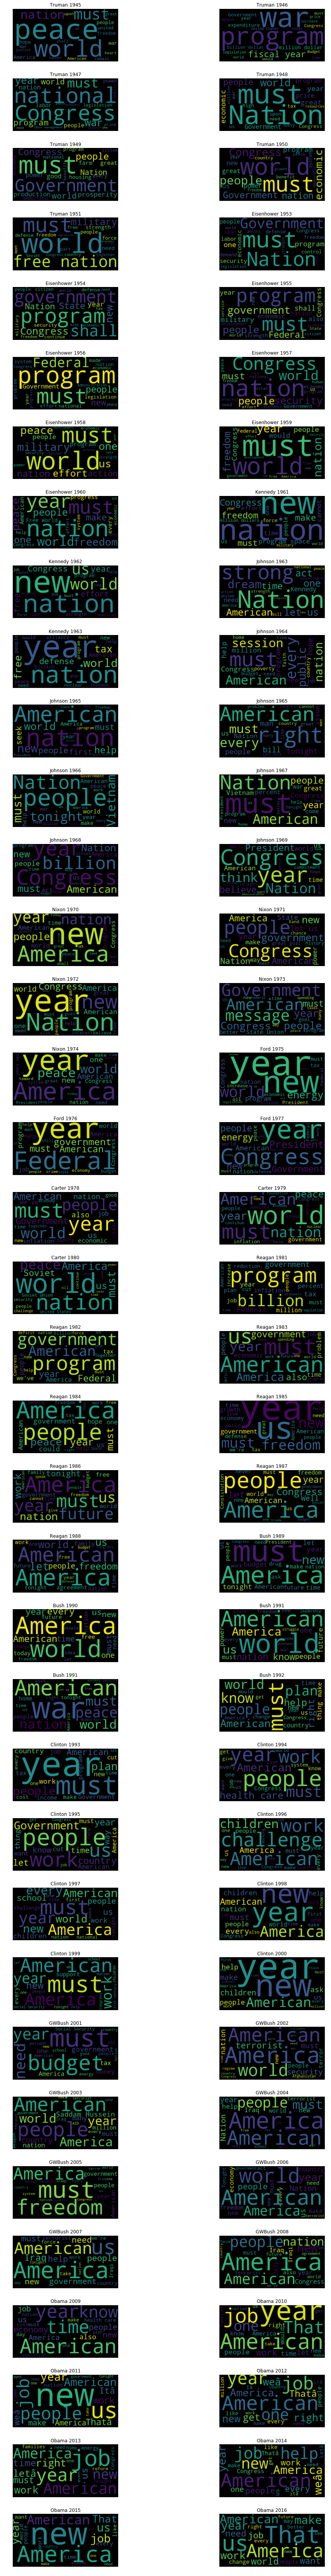

In [13]:
word_clouds(df.text)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from nltk.corpus import stopwords

X_train, X_test, y_train, y_test = train_test_split(df.text, df.path, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the speeches
                             min_df=5, # only use words that appear at least five times
                             stop_words='english', #remove stop words
                             lowercase=True, #convert everything to lower case
                             use_idf=True,#inverse document frequencies in our weighting
                             norm=u'l2', #a correction factor so that longer and shorter speeches get treated equally
                             smooth_idf=True #prevents divide-by-zero errors
                            )

In [15]:
#Applying the vectorizer
sotus_tfidf = vectorizer.fit_transform(df.text)
print("Number of features: %d" % sotus_tfidf.get_shape()[1])

Number of features: 3845


In [16]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 1379 to 130.
svd= TruncatedSVD(130)
lsa = make_pipeline(svd, Normalizer(copy=False))
# Run SVD on the training data, then project the training data.
sotus_lsa = lsa.fit_transform(sotus_tfidf)
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(
    int(explained_variance * 100)))

xs, ys = sotus_lsa[:, 0], sotus_lsa[:, 1]

Explained variance of the SVD step: 99%


In [17]:
file_list = []
for paths in df.path:
    path, file = paths.split('\\')
    file_list.append(file)
    
#feature names
terms = vectorizer.get_feature_names()

In [18]:
km = KMeans(n_clusters=2)
km.fit(sotus_tfidf)
clusters = km.labels_.tolist()

df['cluster'] = clusters

In [19]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(2):
    print("Cluster %d words:" % i, end=' ')
    
    for ind in order_centroids[i, :20]: #replace 6 with n words per cluster
        print(terms[ind], end=', ')
    print('\n')

Top terms per cluster:

Cluster 0 words: ll, iraq, parents, businesses, don, college, terrorists, 21st, medicare, bipartisan, kids, got, tell, class, terror, drugs, cuts, afghanistan, iraqi, thing, 

Cluster 1 words: shall, expenditures, farm, vietnam, recommend, recommendations, communist, peoples, aggression, management, reduction, employment, adequate, period, capacity, oil, xand, affairs, organization, increases, 



In [20]:
cluster_names = {0: 'Post 1980', 1: 'Pre 1980'}

In [21]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
kmean_df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=file_list, party=df.party)) 

#group by cluster
groups = kmean_df.groupby('label')

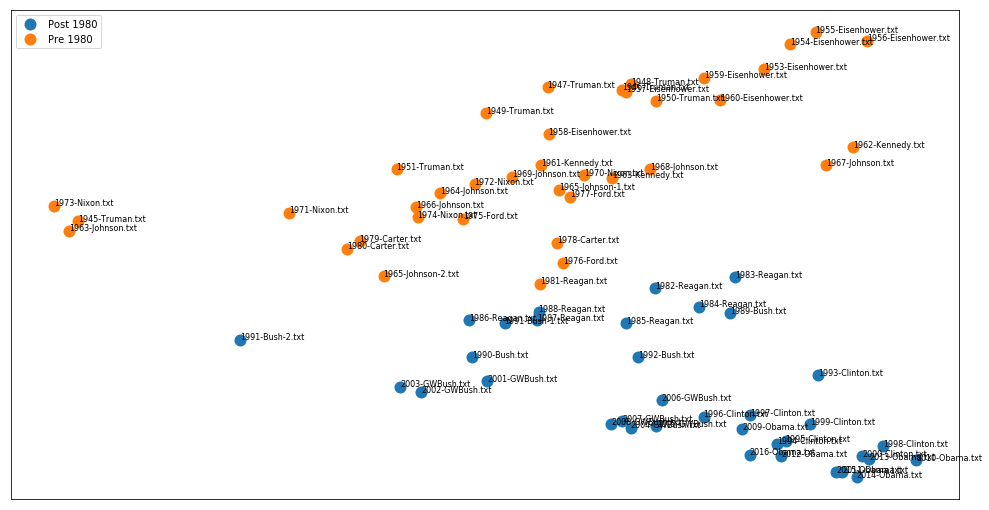

In [22]:
# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], #color='blues',
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',       #both major and minor ticks are affected
        bottom=False,      
        top=False,         
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         
        which='both',     
        left=False,      
        top=False,         
        labelleft=False)
    
ax.legend(numpoints=1, loc='upper left')  #show legend with only 1 point

#add label in x,y position with the label as the speech title
for i in range(len(df)):
    ax.text(kmean_df.loc[i]['x'], kmean_df.loc[i]['y'], kmean_df.loc[i]['title'], size=8)  

    
    
plt.show() #show the plot

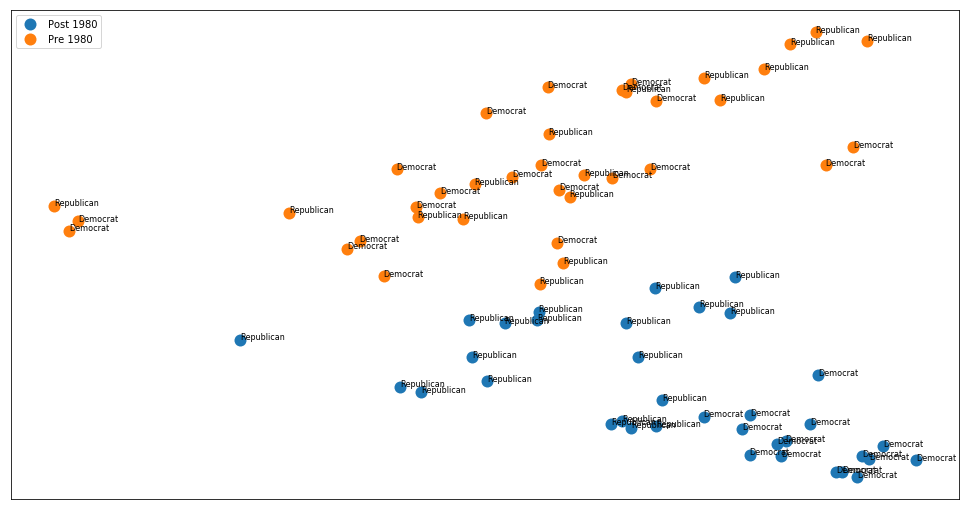

In [23]:
# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',       #both major and minor ticks are affected
        bottom=False,      
        top=False,         
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         
        which='both',     
        left=False,      
        top=False,         
        labelleft=False)
    
ax.legend(numpoints=1, loc='upper left')  #show legend with only 1 point

#add label in x,y position with the label as the speech title
for i in range(len(df)):
    ax.text(kmean_df.loc[i]['x'], kmean_df.loc[i]['y'], kmean_df.loc[i]['party'], size=8)  

    
    
plt.show() #show the plot

In [24]:
km1 = KMeans(n_clusters=4)
km1.fit(sotus_tfidf)
clusters1 = km1.labels_.tolist()

df['cluster1'] = clusters1

In [25]:
print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids1 = km1.cluster_centers_.argsort()[:, ::-1] 

for i in range(4):
    print("Cluster %d words:" % i, end=' ')
    
    for ind in order_centroids1[i, :20]: #replace 6 with n words per cluster
        print(terms[ind], end=', ')
    print('\n')

Top terms per cluster:

Cluster 0 words: shall, expenditures, farm, vietnam, recommend, recommendations, communist, peoples, adequate, aggression, employment, management, period, reduction, capacity, oil, xand, affairs, organization, increases, 

Cluster 1 words: college, businesses, ll, don, parents, 21st, class, got, companies, cuts, kids, ought, invest, donâ, bipartisan, medicare, big, thing, tell, global, 

Cluster 2 words: iraq, terrorists, iraqi, terror, saddam, al, terrorist, hussein, qaeda, gulf, afghanistan, iraqis, coalition, victory, regime, medicare, relief, enemy, funding, 11th, 

Cluster 3 words: ll, nicaragua, space, revolution, deficits, dreams, drugs, yes, seven, excellence, tell, parents, strategic, dependency, 1980, veto, kids, idea, gramm, rudman, 



In [26]:
cluster_names1 = {0: 'Pre 1980', 1: 'GW Bush', 2: 'Post 1980', 3: 'Post 1990 Democrats'}

#create data frame that has the result of the MDS plus the cluster numbers and titles
kmean_df1 = pd.DataFrame(dict(x=xs, y=ys, label=clusters1, title=file_list, party=df.party)) 

#group by cluster
groups1 = kmean_df1.groupby('label')

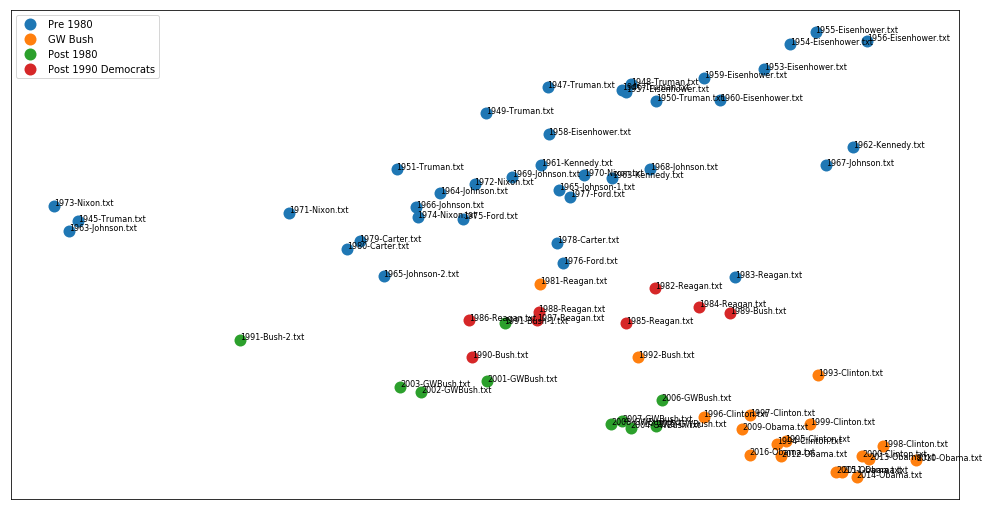

In [27]:
# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups1:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names1[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',       #both major and minor ticks are affected
        bottom=False,      
        top=False,         
        labelbottom=False)
    ax.tick_params(\
        axis= 'y',         
        which='both',     
        left=False,      
        top=False,         
        labelleft=False)
    
ax.legend(numpoints=1, loc='upper left')  #show legend with only 1 point

#add label in x,y position with the label as the speech title
for i in range(len(df)):
    ax.text(kmean_df1.loc[i]['x'], kmean_df1.loc[i]['y'], kmean_df1.loc[i]['title'], size=8)  

    
    
plt.show() #show the plot